In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 


file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<Axes: xlabel='var_1', ylabel='var_2'>

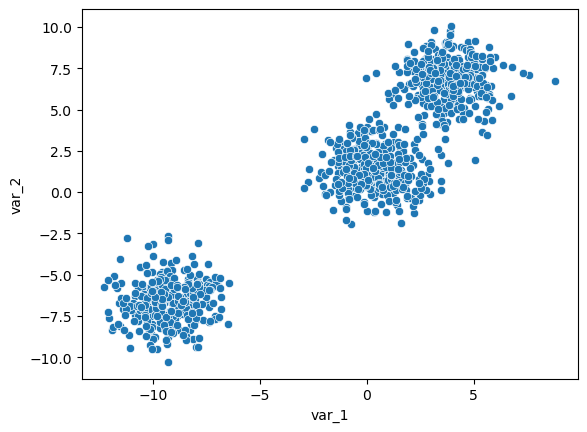

In [2]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = data)

In [3]:
import numpy as np 
from sklearn.cluster import KMeans

In [80]:
kmeans_model = KMeans(n_clusters = 3, random_state = 100, n_init= 1)

In [81]:
kmeans_model.fit(data)

KMeans(n_clusters=3, n_init=1, random_state=100)

In [82]:
kmeans_model.predict(data)

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [83]:
data['label'] = kmeans_model.predict(data)

<Axes: xlabel='var_1', ylabel='var_2'>

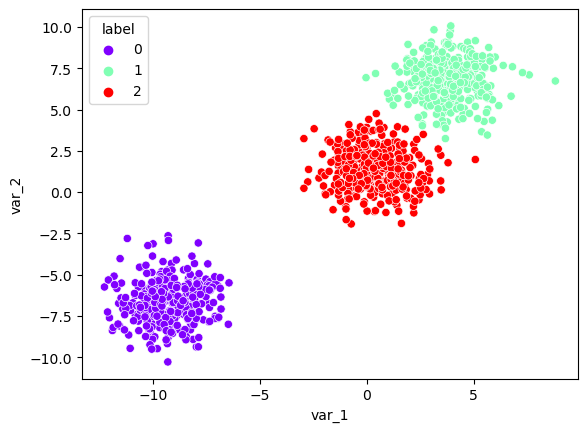

In [84]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = data, hue = 'label', palette = 'rainbow')

In [85]:
# k 값을 찾는 방법 - 엘보우 기법 - 클러스터의 중점과 각 데이터 간긔 거리를 기반으로 계산 

In [86]:
kmeans_model.inertia_ # 이너셔 - 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합

3090.033237076661

In [87]:
# 이너셔는 클러스타의 중점과 데이터 간의 거리이기 때문에, 작을수록 그룹별로 더 오밀조밀 잘 모이게 분류됐다고 할 수 있다
# 작을수록 좋으나 k 값이 커지면 거리의 합인 이너셔는 필연적으로 작아진다.

In [89]:
temp_model = KMeans(n_clusters = 500, random_state = 100, n_init=1)
temp_model.fit(data)
temp_model.inertia_

6.4107510884779835

In [90]:
# 클러스터링에서는 클러스터수를 가급적 적게 유지하면서 동시에 거리의 합이 어느정 도 작은 적절한 k값을 찾아야 한다.

In [92]:
distance = []
for k in range(2, 10): 
    k_model = KMeans(n_clusters =k, n_init=1)
    k_model.fit(data)
    distance.append(k_model.inertia_)

In [93]:
distance # each distance when k is from 2 to 10 

[9908.551424778394,
 3090.033237076661,
 2775.4375546298443,
 2413.3417699591573,
 2051.387146705249,
 1809.5111362956104,
 1609.0297729242684,
 1369.562861605676]

<Axes: >

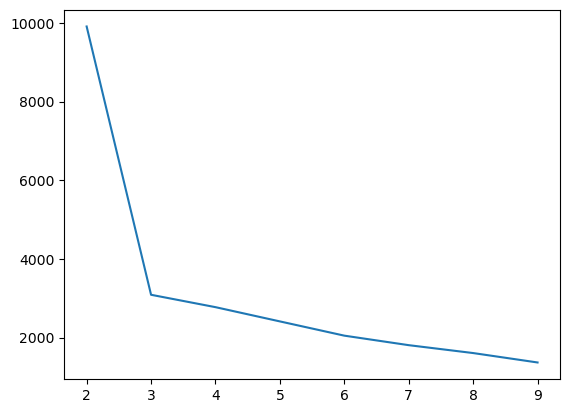

In [94]:
sns.lineplot(x=range(2, 10), y = distance)

In [23]:
# distnace가 급격히 줄어드는 k값을 포착하여 최적의 k값을 찾는다 여기서는 3!

In [95]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

In [97]:
#customer.head()
len(customer)

240454

In [98]:
customer['cc_num'].nunique()

100

In [101]:
customer['category'].nunique()

11

In [102]:
# 어떤 범주에서 얼마만큼 지불했는지 계산 후 k-평균 군집화로 비슷한 특성을 가진 고객끼리 묶기

In [103]:
customer_dummy = pd.get_dummies(customer, columns = ['category'])
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [104]:
cat_list = customer_dummy.columns[2:] # 변수 이름 리스트 생성 
cat_list

Index(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery', 'category_health_fitness',
       'category_home', 'category_kids_pets', 'category_misc',
       'category_personal_care', 'category_shopping', 'category_travel'],
      dtype='object')

In [105]:
for i in cat_list: 
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [106]:
customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,250072.42,13951.22,9175.56,36490.48,47944.34,12227.52,20009.92,21961.88,31078.34,16686.28,37421.16,3125.72
4599735407877245080,96104.05,6065.69,10049.34,11201.13,16248.52,3013.14,9423.36,10710.95,8514.05,6823.09,12336.91,1717.87
4666314527820883145,73275.54,4612.23,3079.99,1593.63,13434.30,3894.14,6387.17,3114.63,4199.44,3584.61,18135.65,11239.75


In [36]:
# 스케일링 -> k-평균 군집화는 거리 기반 알고리즘이기 때문에 데이터의 스케일에 영향을 받는다. 

In [107]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), 
                         columns = customer_agg.columns, 
                         index = customer_agg.index)

In [108]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


In [110]:
# 평균에 가까울 수록 0에 근접한 값을 보여주고, 더 많이 사용했으면 더 큰 양수를, 더 적게 사용했으면 더 작은 음수를 가진다. 

<Axes: >

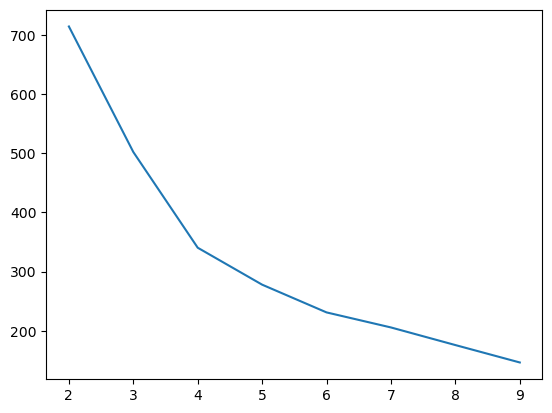

In [124]:
distance = []
for k in range(2, 10): 
    k_model = KMeans(n_clusters = k, n_init= 4)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2, 10), y=distance)

In [125]:
# k 값을 결정하기 굉장히 어려운 상태 
# 실루엣 계수를 사용 : 클러스터 내부에서 평균거리와 최 근접한 다른 클러스터 데이터의 평균 거리도 점수에 반영

In [126]:
from sklearn.metrics import silhouette_score 

In [139]:
silhouette = []
for k in range(2, 10): 
    k_model = KMeans(n_clusters = k, n_init='auto')
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

<Axes: >

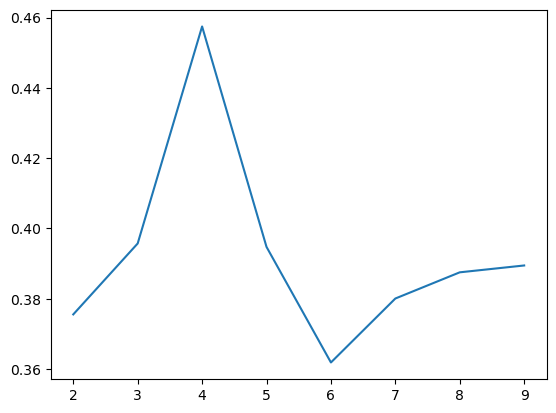

In [140]:
sns.lineplot(x=range(2, 10), y = silhouette)

In [49]:
# 실루엣 ㄱㅖ수가 높은 값일수록 좋은 분류  흠.... 여기서는 2?

In [118]:
k_model = KMeans(n_clusters=4, n_init=1)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [119]:
scaled_df['label'] = labels

In [120]:
# 클러스터링 결과를 해석하기 위해 label별로 데이터 요약 
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_count = scaled_df.groupby('label').count()['category_travel'] # label별 등장횟수
scaled_df_count

label
0     8
1    45
2    37
3    10
Name: category_travel, dtype: int64

In [121]:
scaled_df_count = scaled_df_count.rename('count')
scaled_df_count

label
0     8
1    45
2    37
3    10
Name: count, dtype: int64

In [122]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [123]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
1,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
2,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
